In [1]:
# import data
from datetime import datetime
begin = datetime.now()
import pandas as pd
import numpy as np
test = pd.read_csv('test.csv/test.csv')
test = pd.DataFrame(test)
# data=data.dropna(subset=['title','text'])
test['title'] = test['title'].astype("string")
test["text"] = test["text"].astype("string")
# test["author"] = test["author"].astype("string")

test=test.fillna(' ')
# check data
print(test.shape)
test.head(10)

test.drop('author', axis = 1)




(5200, 4)


id                                              title  \
0     20800  Specter of Trump Loosens Tongues, if Not Purse...   
1     20801  Russian warships ready to strike terrorists ne...   
2     20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3     20803  Tim Tebow Will Attempt Another Comeback, This ...   
4     20804                    Keiser Report: Meme Wars (E995)   
...     ...                                                ...   
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5198  25998  300 US Marines To Be Deployed To Russian Borde...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                                                   text  
0     PALO ALTO, Calif.  —   After years of scorning...  
1     Russian warships ready to strike terrorists ne...  
2     Videos #NoDAPL: Native American Leaders Vow to...  
3     If at first you don’t succeed, try a different...  
4     42 mins ago 1 Views 0 Comments 0 Likes 'For th...  
...                                                 ...  
5195  Of all the dysfunctions that plague the world’...  
5196  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...  
5197  Good morning. (Want to get California Today by...  
5198  « Previous - Next » 300 US Marines To Be Deplo...  
5199  Perhaps you’ve seen the new TV series whose pi...  

[5200 rows x 3 columns]

In [2]:
#making dictionary {id:text}

text_dict = {}
for i in range(0, len(test)):
    text_dict[test.id[i]] = test.text[i] #using text 
text_dict

{20800: 'PALO ALTO, Calif.  —   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trump’s election would “range between disastrous and terrible. ” Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of “anger” and “bigotry. ” Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trump’s candidacy even as other supporters flee. (He also recently gav

DBSCAN clustering from https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

using LDA to discover a specified number of topics

K means clustering

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


# email module has some useful functions
import os, sys, email,re

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = test['title']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [13]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

00  000  00pm   03   05   07   10  100  1000  100k  ...  القذافي  الكذب  \
0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...      0.0    0.0   
1  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...      0.0    0.0   
2  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...      0.0    0.0   
3  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...      0.0    0.0   
4  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...      0.0    0.0   

   بقلم  تييري  رسائل   سر  كلينتون  ميسان  هيلاري  والإخوان  
0   0.0    0.0    0.0  0.0      0.0    0.0     0.0       0.0  
1   0.0    0.0    0.0  0.0      0.0    0.0     0.0       0.0  
2   0.0    0.0    0.0  0.0      0.0    0.0     0.0       0.0  
3   0.0    0.0    0.0  0.0      0.0    0.0     0.0       0.0  
4   0.0    0.0    0.0  0.0      0.0    0.0     0.0       0.0  

[5 rows x 10733 columns]

In [14]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points

        Parameters
        -----------
        data: array or matrix, number_rows, number_features

        Returns
        -----------
        centroids: array, k, number_features
        """

        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])

        return self.centroids

    def assign_clusters(self, data):
            """Compute distance of data from clusters and assign data point
               to closest cluster.

            Parameters
            ----------
            data: array or matrix, number_rows, number_features

            Returns
            --------
            cluster_labels: index which minmises the distance of data to each
            cluster

            """

            if data.ndim == 1:
                data = data.reshape(-1, 1)

            dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
            self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)

            return  self.cluster_labels


    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points

        Parameters
        -----------
        data: array or matrix, number_rows, number_features

        Returns
        -----------
        centroids: array, k, number_features
        """

        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])

        return self.centroids
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------

        Returns
        -------
        instance of kmeans class

        """
        self.centroids = self.initialise_centroids(data)

        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

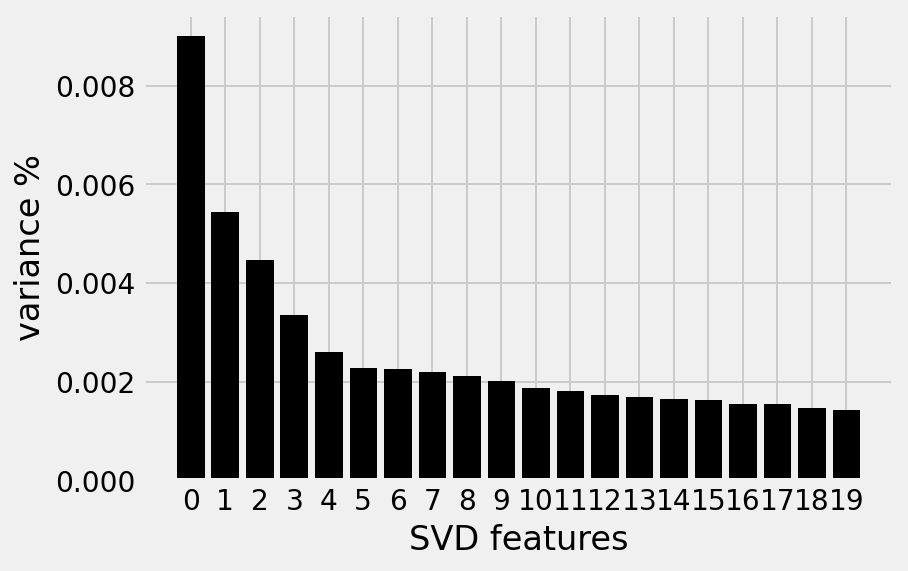

In [15]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
from sklearn.decomposition import TruncatedSVD



svd = TruncatedSVD(n_components = 20)
svd_components = svd.fit_transform(tf_idf_array)
# Plot the explained variances
features = range(svd.n_components)
plt.bar(features, svd.explained_variance_ratio_, color='black')
plt.xlabel('SVD features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
svd_components = pd.DataFrame(svd_components)

Text(0, 0.5, 'SVD 2')

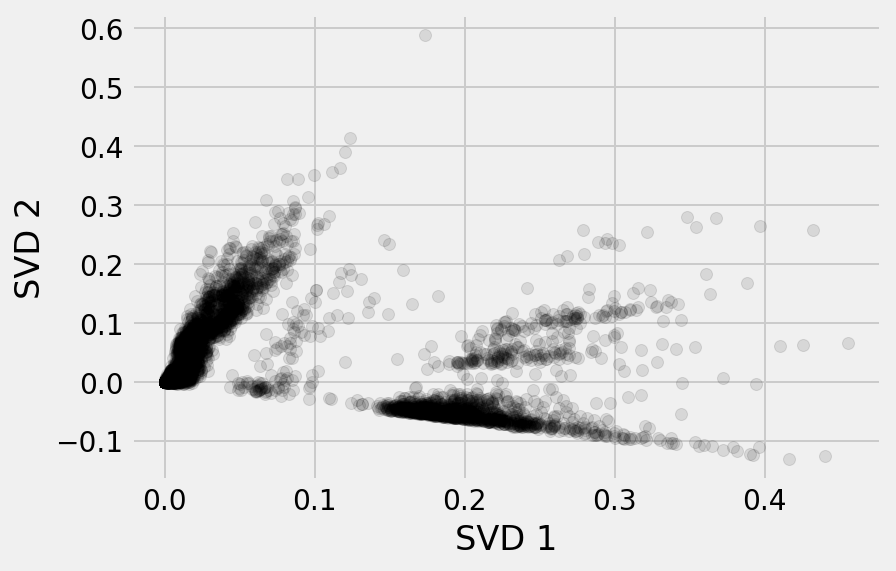

In [16]:
plt.scatter(svd_components[0], svd_components[1], alpha=.1, color='black')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')

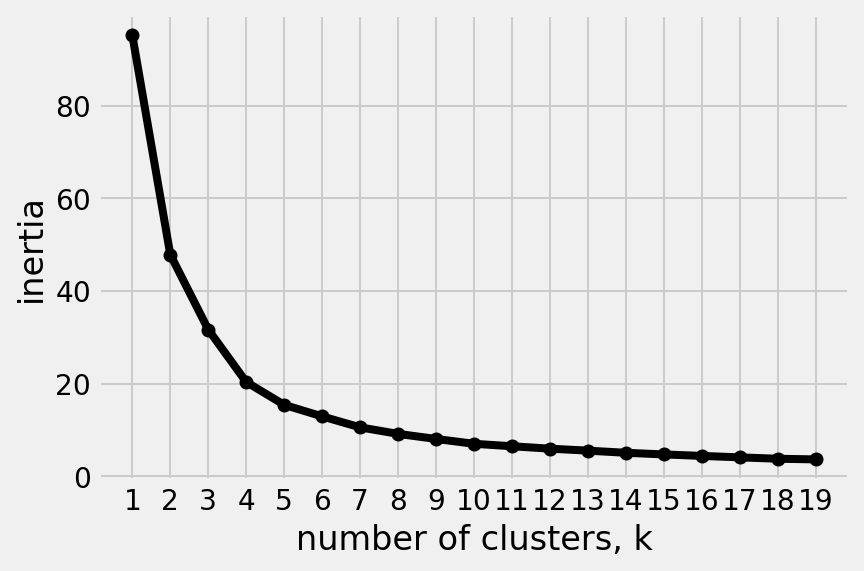

In [17]:
ks = range(1, 20)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(svd_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


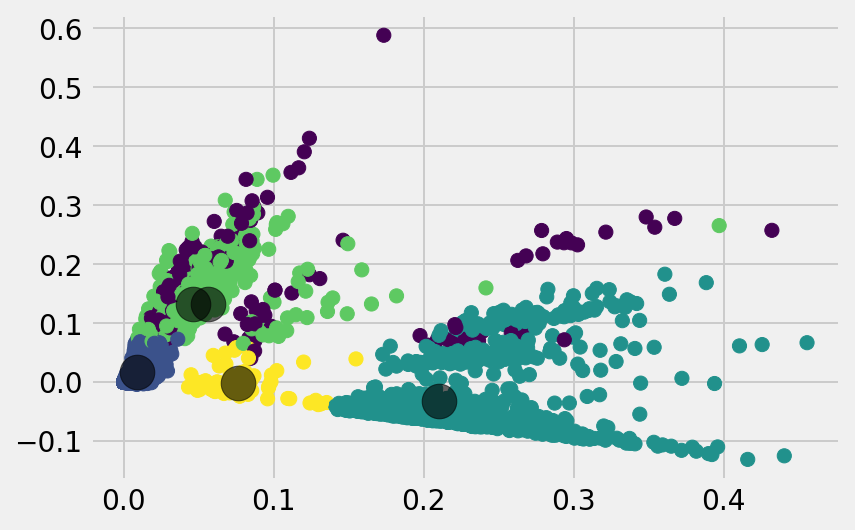

In [18]:
sklearn_svd = TruncatedSVD(n_components = 3)
Y_sklearn = sklearn_svd.fit_transform(tf_idf_array)
test_e = Kmeans(5, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

ok we now decide to use 3

In [19]:
from sklearn.cluster import KMeans
sklearn_svd = TruncatedSVD(n_components = 3)
Y_sklearn = sklearn_svd.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [20]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

In [21]:
dfs

[      features     score
 0          new  0.119208
 1         york  0.117150
 2        times  0.115302
 3        obama  0.006725
 4         says  0.006631
 5       police  0.005327
 6        syria  0.005323
 7        china  0.004998
 8        north  0.004904
 9        court  0.004791
 10    briefing  0.004575
 11       death  0.004394
 12       today  0.004345
 13        dies  0.004325
 14  california  0.004121,
      features     score
 0   breitbart  0.010899
 1    election  0.008982
 2       video  0.007767
 3         war  0.006912
 4      russia  0.006771
 5        news  0.006141
 6        2016  0.005907
 7     america  0.005807
 8       obama  0.005516
 9       world  0.005078
 10     police  0.004694
 11     report  0.004604
 12   american  0.004493
 13    russian  0.004352
 14       time  0.004187,
          features     score
 0         hillary  0.145899
 1         clinton  0.142491
 2             fbi  0.048366
 3   investigation  0.030213
 4           email  0.028990
 5      

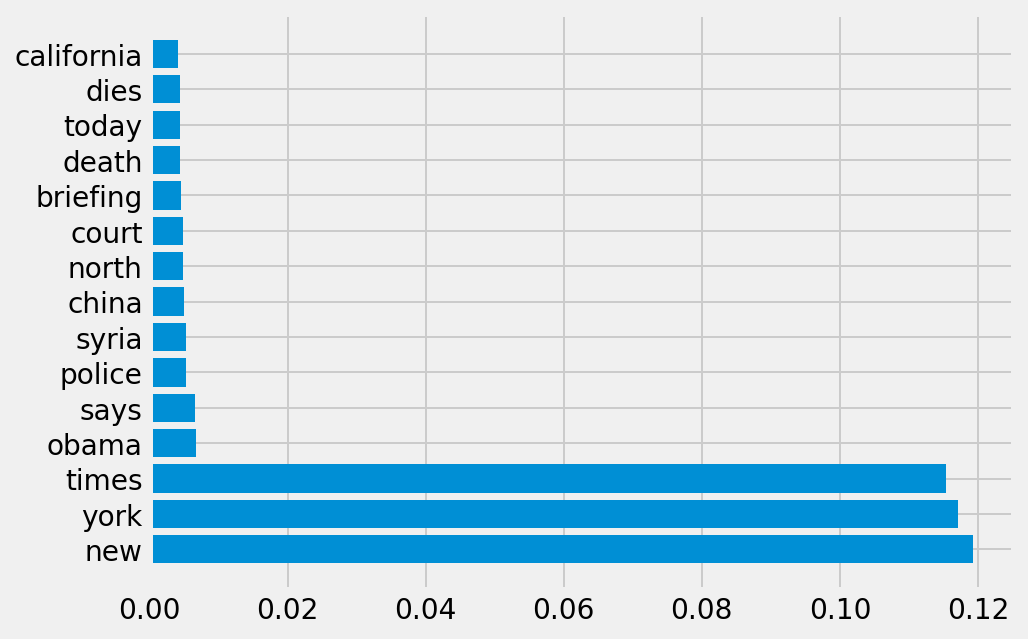

In [22]:
fig = plt.figure()

list_scores = []
for score in dfs[0].score:
    list_scores.append(score) 

# ax = fig.add_axes(list_scores)
ax = fig.add_axes([0,0,1,1])

words = []
for i in dfs[0].features:
    words.append(i) 

keywords = words
ax.barh(keywords, list_scores)
# ax.invert_yaxis()
plt.show()

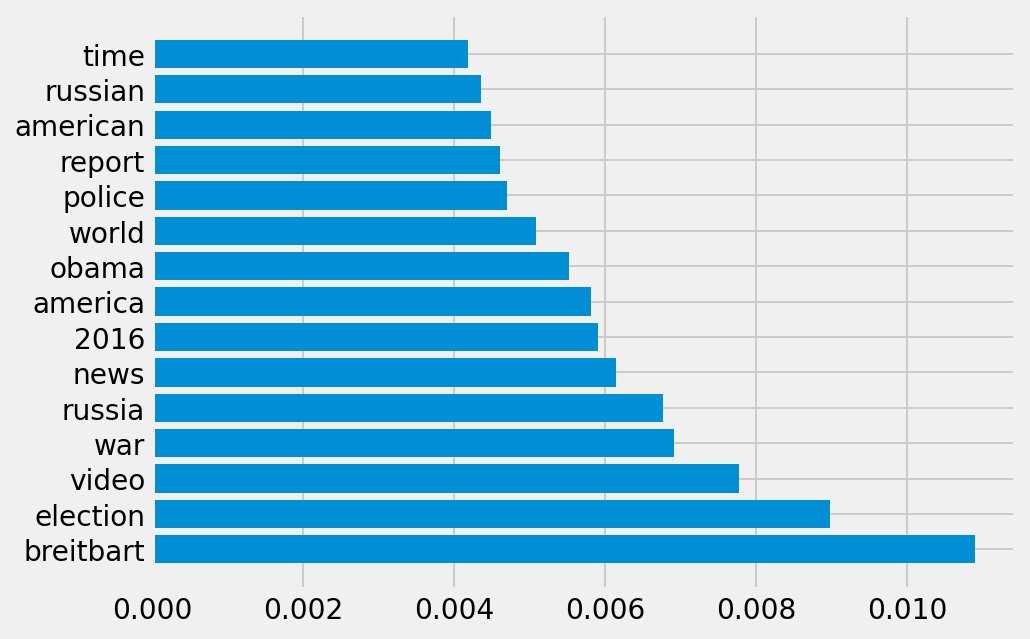

In [23]:
fig = plt.figure()

list_scores = []
for score in dfs[1].score:
    list_scores.append(score) 

# ax = fig.add_axes(list_scores)
ax = fig.add_axes([0,0,1,1])

words = []
for i in dfs[1].features:
    words.append(i) 

keywords = words
ax.barh(keywords, list_scores)
# ax.invert_yaxis()
plt.show()

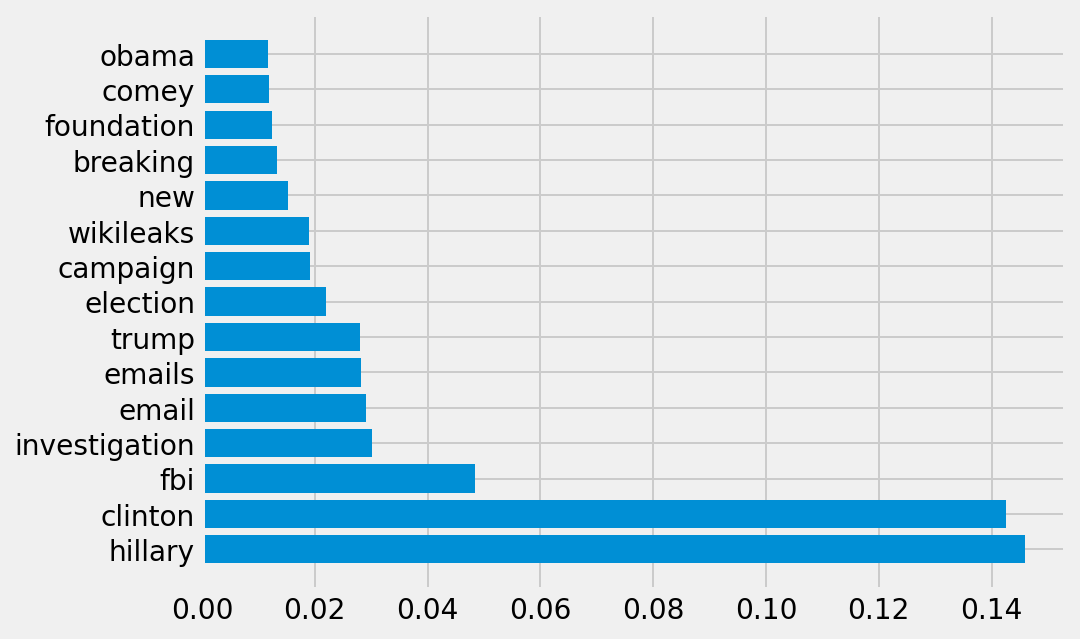

In [24]:
fig = plt.figure()

list_scores = []
for score in dfs[2].score:
    list_scores.append(score) 

# ax = fig.add_axes(list_scores)
ax = fig.add_axes([0,0,1,1])

words = []
for i in dfs[2].features:
    words.append(i) 

keywords = words
ax.barh(keywords, list_scores)
# ax.invert_yaxis()
plt.show()

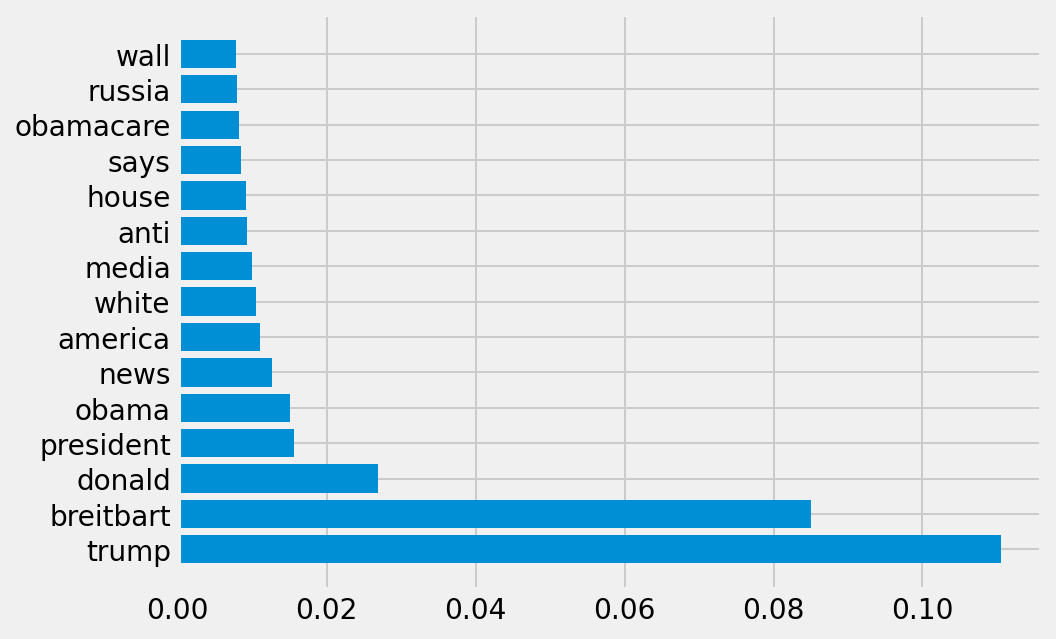

In [25]:
fig = plt.figure()

list_scores = []
for score in dfs[3].score:
    list_scores.append(score) 

# ax = fig.add_axes(list_scores)
ax = fig.add_axes([0,0,1,1])

words = []
for i in dfs[3].features:
    words.append(i) 

keywords = words
ax.barh(keywords, list_scores)
# ax.invert_yaxis()
plt.show()

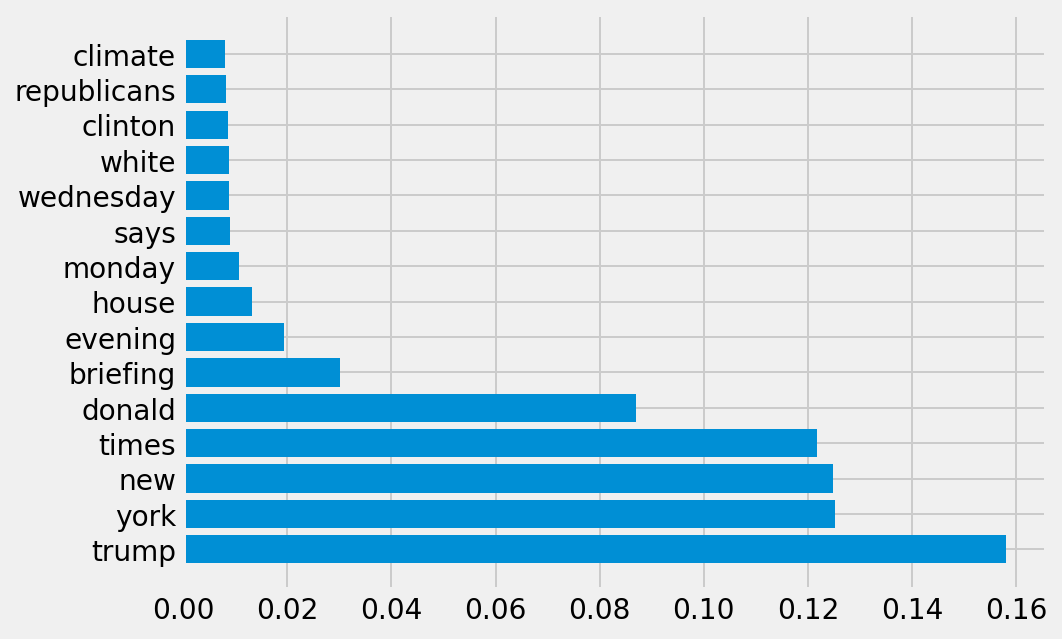

In [26]:
fig = plt.figure()

list_scores = []
for score in dfs[4].score:
    list_scores.append(score) 

# ax = fig.add_axes(list_scores)
ax = fig.add_axes([0,0,1,1])

words = []
for i in dfs[4].features:
    words.append(i) 

keywords = words
ax.barh(keywords, list_scores)
# ax.invert_yaxis()
plt.show()

# save results to excel 

In [27]:
test['K_means'] = pd.Series(prediction, index=test.index)

In [28]:
test.head()

id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   

                    author                                               text  \
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...   
1                           Russian warships ready to strike terrorists ne...   
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...   
3            Daniel Victor  If at first you don’t succeed, try a different...   
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...   

   K_means  
0        0  
1        1  
2        1  
3        0  
4        1

In [29]:
test.K_means.unique()

array([0, 1, 2, 3, 4])

In [30]:
test.to_csv('kmeans_test_text.csv', index=False)